In [1]:
%matplotlib inline

$$ \LaTeX \text{ command declarations here.}
\newcommand{\N}{\mathcal{N}}
\newcommand{\R}{\mathbb{R}}
\renewcommand{\vec}[1]{\mathbf{#1}}
\newcommand{\norm}[1]{\|#1\|_2}
\newcommand{\d}{\mathop{}\!\mathrm{d}}
\newcommand{\qed}{\qquad \mathbf{Q.E.D.}}
\newcommand{\vx}{\mathbf{x}}
\newcommand{\vy}{\mathbf{y}}
\newcommand{\vt}{\mathbf{t}}
\newcommand{\vb}{\mathbf{b}}
\newcommand{\vw}{\mathbf{w}}
$$

# EECS 445:  Machine Learning
## Hands On 05:  Linear Regression II
* Instructor:  **Zhao Fu, Valli, Jacob Abernethy and Jia Deng**
* Date:  September 26, 2016

### Problem 1a: MAP estimation for Linear Regression with unusual Prior
Assume we have $n$ vectors $\vec{x}_1, \cdots, \vec{x}_n$. We also assume that for each $\vec{x}_i$ we have observed a *target* value $t_i$, where
$$
\begin{gather}
t_i = \vec{w}^T \vec{x_i} + \epsilon \\ 
\epsilon \sim \mathcal{N}(0, \beta^{-1})
\end{gather}
$$
where $\epsilon$ is the "noise term".

(a) Quick quiz: what is the likelihood *given* $\vec{w}$? That is, what's $p(t_i | \vec{x}_i, \vec{w})$?

**Answer**: $p(t_i | \vec{x}_i, \vec{w}) = \mathcal{N}(t_i|\vec{w}^\top \vec{x_i}, \beta^{-1}) = \frac{1}{(2\pi \beta^{-1})^\frac{1}{2}} \exp{(-\frac{\beta}{2}(t_i - \vec{w}^\top \vec{x_i})^2)}$

### Problem 1: MAP estimation for Linear Regression with unusual Prior
Assume we have $n$ vectors $\vec{x}_1, \cdots, \vec{x}_n$. We also assume that for each $\vec{x}_i$ we have observed a *target* value $t_i$, sampled IID. We will also put a *prior* on $\vec{w}$, using PSD matrix $\Sigma$.
$$
\begin{gather}
t_i = \vec{w}^T \vec{x_i} + \epsilon \\ 
\epsilon \sim \mathcal{N}(0, \beta^{-1}) \\
\vec{w} \sim \mathcal{N}(0, \Sigma)
\end{gather}
$$
Note: the difference here is that our prior is a multivariate gaussian with *non-identity* covariance! Also we let $\mathcal{X} = \{\vec{x}_1, \cdots, \vec{x}_n\}$

(a) Compute the log posterior function, $\log p(\vec{w}|\vec{t}, \mathcal{X},\beta)$

*Hint*: use Bayes' Rule

(b) Compute the MAP estimate of $\vec{w}$ for this model

*Hint*: the solution is very similar to the MAP estimate for a gaussian prior with identity covariance

### Problem 2: Handwritten digit classification with logistic regression

Download the file `mnist_49_3000.mat` from Canvas. This is a subset of the MNIST handwritten digit database, which is a well-known benchmark database for classification algorithms. This subset contains examples of the digits 4 and 9. The data file contains variables x and y, with the former containing patterns and the latter labels. The images are stored as column vectors.

**Exercise**:
* Load data and visualize data (Use scipy.io.loadmat to load matrix)
* Add bias to the features $\phi(\vx)^T = [1, \vx^T]$
* Split dataset into training set with the first 2000 data and test set with the last 1000 data

In [2]:
# all the packages you need
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from numpy.linalg import inv

In [3]:
# load data from .mat
mat = scipy.io.loadmat('mnist_49_3000.mat')
print (mat.keys())

dict_keys(['__globals__', '__header__', 'y', 'x', '__version__'])


In [4]:
x = mat['x'].T
y = mat['y'].T
print (x.shape, y.shape)

(3000, 784) (3000, 1)


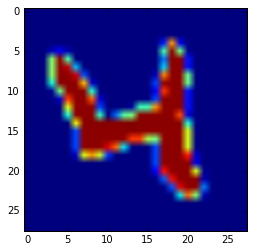

In [5]:
# show example image
plt.imshow (x[4, :].reshape(28, 28))

In [6]:
# add bias term
x = np.hstack([np.ones((3000, 1)), x])

# convert label -1 to 0
y[y == -1] = 0

print(y[y == 0].size, y[y == 1].size)

# split into train set and test set
x_train = x[: 2000, :]
y_train = y[: 2000, :]
x_test = x[2000 : , :]
y_test = y[2000 : , :]

1481 1519


Implement Newton’s method to find a minimizer of the regularized negative log likelihood. Try setting $\lambda$ = 10. Use the first 2000 examples as training data, and the last 1000 as test data. 

**Exercise**
* Implement the loss function with the following formula:
$$
\begin{align}
E(\vw) 
&= -\ln P(\vy = \vt| \mathcal{X}, \vw) \\
&= \boxed{\sum \nolimits_{n=1}^N \left[ t_n \ln (1+\exp(-\vw^T\phi(\vx_n))) + (1-t_n) \ln(1+\exp(\vw^T\phi(\vx_n))) \right] + \lambda \vw^T\vw}\\
\end{align}
$$
* Implement the gradient of loss $$\nabla_\vw E(\vw) = \boxed{ \Phi^T \left( \sigma(\Phi \vw) - \vt \right) + \lambda \vw}$$
where $\sigma(a) = \frac{\exp(a)}{1+\exp(a)}$

In [7]:
# Initialization of parameters
w = np.zeros((785, 1))
lmd = 10

In [8]:
def computeE(w, x, y, lmd) :
    E = np.dot(y.T, np.log(1 + np.exp(-np.dot(x, w)))) + np.dot(1 - y.T, np.log(1 + \
        np.exp(np.dot(x, w)))) + lmd * np.dot(w.T, w)
    return E[0][0]
print (computeE(w, x, y, lmd))

2079.44154168


In [9]:
def sigmoid(a) : 
    return np.exp(a + 1e-6) / (1 + np.exp(a + 1e-6))

def computeGradientE(w, x, y, lmd) : 
    return np.dot(x.T, sigmoid(np.dot(x, w)) - y) + lmd * w
print (computeGradientE(w, x, y, lmd).shape)

(785, 1)


### Recall: Newton's Method
$$
\vx_{n+1}= \vx_n - \left(\nabla^2 f(\vx_n)\right)^{-1} \nabla_\vx f(\vx_n)
$$
of which $\nabla^2 f(\vx_n)$ is **Hessian matrix** which is the *second order derivative*
$$
\nabla^2 f = \begin{bmatrix}
\frac{\partial f}{\partial x_1\partial x_1} & \cdots & \frac{\partial f}{\partial x_1\partial x_n}\\ 
\vdots & \ddots & \vdots\\ 
\frac{\partial f}{\partial x_n\partial x_1} & \cdots & \frac{\partial f}{\partial x_n\partial x_n}
\end{bmatrix}
$$

$$
\begin{align}
\nabla^2 E(\vw) 
&= \nabla_\vw \nabla_\vw E(\vw) \\
&= \sum \nolimits_{n=1}^N \phi(\vx_n) r_n(\vw) \phi(\vx_n)^T + \lambda I
\end{align}
$$
of which $r_n(\vw) = \sigma(\vw^T \phi(\vx_n)) \cdot ( 1 - \sigma(\vw^T \phi(\vx_n)) )$

**Exercise** 
* Implement $r_n(\vw)$
* Implement $\nabla^2 E(\vw)$
* Implement update function

In [10]:
def computeR(w, x, y) : 
    return sigmoid(np.dot(x, w)) * (1 - sigmoid(np.dot(x, w)))
# print (computeR(w, x, y).T)

def computeHessian(w, x, y, lmd) :
    return np.dot(x.T * computeR(w, x, y).T, x) + lmd * np.eye(w.shape[0])
# print (computeHessian(w, x, y, lmd))

def update(w, x, y, lmd) :
    hessian = computeHessian(w, x, y, lmd)
    gradient = computeGradientE(w, x, y, lmd)
#     print (np.sum(hessian))
    return w - np.dot(inv(hessian), gradient)
print (update(w, x, y, lmd).shape)

(785, 1)


**Exercise**
* Implement training process(When to stop iterating?)
* Implement test function
* Compute the test error
* Compute the value of the objective function at the optimum

In [11]:
def train(w, x, y, lmd) :
    w_new = update(w, x, y, lmd)
    diff = np.sum(np.abs(w_new - w))
    while diff > 1e-6:
        w = w_new
        w_new = update(w, x, y, lmd)
        diff = np.sum(np.abs(w_new - w))
    return w
w_train = train(w, x_train, y_train, lmd)

In [12]:
def test(w, x, y) :
    tmp = np.dot(x, w)
    y_pred = np.zeros(y.shape)
    y_pred[tmp > 0] = 1
    error = np.mean(np.abs(y_pred - y))
    return error
print (test(w, x_test, y_test))
print (test(w_train, x_test, y_test))
print (computeE(w_train, x_train, y_train, lmd))

0.515
0.045
325.012508163
